In [1]:

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable





In [2]:

subdirectory = 'merged_by_country_bert_processed_tweets'

merged_df = pd.DataFrame()

for filename in os.listdir(subdirectory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(subdirectory, filename)

        # Read the CSV file with UTF-8 encoding
        df = pd.read_csv(file_path, encoding='UTF-8', low_memory=False)

        merged_df = pd.concat([merged_df, df], ignore_index=True)

display(merged_df)


,id,city,state,country,lat,lon,date,text,hashtags,following,followers,total_tweets,retweet_count,favorite_count,popularity_score,reach_score,sentiment,sentiment_score
0,2849797.0,NaN,Jijel,Algeria,36.717968,5.983258,2022-03-24 01:27:15,just in: the anonymous collective has hacked t...,['Anonymous'],134,1267,16174,2272,0.0,2272.0,1133.0,NEGATIVE,0.995405
1,3304622.0,NaN,Djelfa,Algeria,34.670396,3.250376,2022-03-28 02:57:22.000000,the oscars just turned into a whole euphoria e...,['Oscars'],1171,511,4132,0,0.0,0.0,0.0,POSITIVE,0.574494
2,149641.0,Madina,Gegharkunik Province,Armenia,40.076370,45.255070,2022-03-02 15:42:31,as the fighting in ukraine continues every day...,['Ukraine'],911,1005,5770,2,1.0,3.0,94.0,POSITIVE,0.997540
3,490809.0,Madina,Gegharkunik Province,Armenia,40.076370,45.255070,2022-03-05 07:45:31,breaking: hrc49 votes overwhelmingly to establ...,"['HRC49', 'Ukraine']",914,1010,5810,84,0.0,84.0,96.0,POSITIVE,0.728889
4,11866.0,Potts Point,New South Wales,Australia,-33.867010,151.225860,2022-03-01 02:44:20,ukraine from the hypocrisy file 385. last year...,['ukraine'],1264,1962,69435,0,0.0,0.0,698.0,NEGATIVE,0.997297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38895,174622.0,Caracas,Distrito Capital,Venezuela,10.500000,-66.933333,2023-04-09 13:56:09,brazil: @lulaoficials equivocations on russia ...,"['Brazil', 'Russia', 'Ukraine', 'BRICS', 'Lula']",1658,165,23786,13,0.0,13.0,0.0,NEGATIVE,0.998619
38896,257974.0,Caracas,Distrito Capital,Venezuela,10.500000,-66.933333,2023-04-13 22:27:22,ukraine: another piece of previously unrecorde...,['Ukraine'],2466,750,31524,432,0.0,432.0,0.0,NEGATIVE,0.998416
38897,339727.0,Caracas,Distrito Capital,Venezuela,10.500000,-66.933333,2023-04-18 12:02:26,ukraine: the ukrainian 25th airborne brigade d...,"['Ukraine', 'Luhansk']",2477,752,31621,94,0.0,94.0,0.0,NEGATIVE,0.997642
38898,253377.0,Lusaka,Lusaka Province,Zambia,-15.406690,28.287130,2023-04-13 17:35:11,president putin: russia will continue performi...,"['Putin', 'Russia', 'multipolar']",1733,1090,4825,86,0.0,86.0,0.0,POSITIVE,0.999598


C:\Users\dngud\AppData\Local\Temp\ipykernel_24396\9986250.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


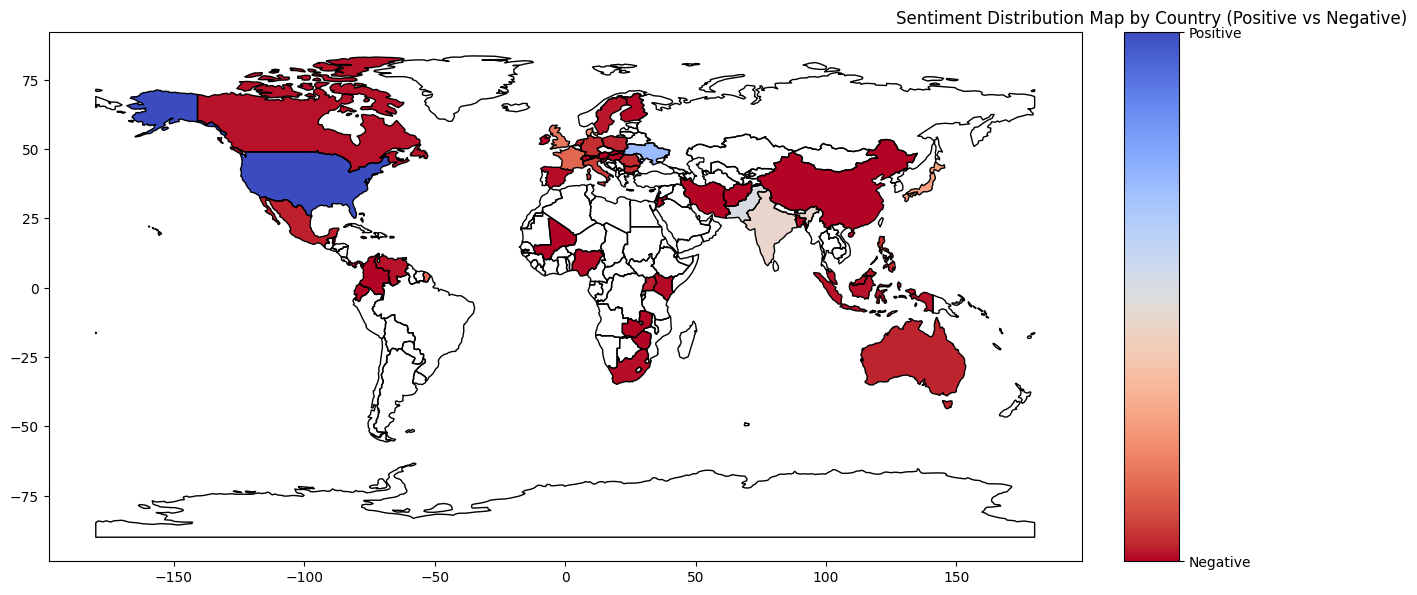

In [12]:


# Assuming your DataFrame is named 'df'
sentiment_sum = df[df['sentiment'].isin(['POSITIVE', 'NEGATIVE'])].groupby(['country']).size().reset_index()
sentiment_sum.columns = ['country', 'sentiment_sum']



# Fix the country name for United States
sentiment_sum['country'] = sentiment_sum['country'].replace({'United States': 'United States of America'})

# Load the world GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Check unique country names in your data
# print("Unique countries in your data:")
# print(sentiment_sum['country'].unique())

# # Check unique country names in the GeoDataFrame
# print("\nUnique countries in GeoDataFrame:")
# print(world['name'].unique())

# Merge the sentiment data with the world GeoDataFrame using the 'country' column
world_merged = world.merge(sentiment_sum, left_on='name', right_on='country')

# Plot the sentiment distribution on the world map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
sm.set_array(world_merged['sentiment_sum'])

world_merged.plot(column='sentiment_sum', cmap='coolwarm_r', ax=ax)

# Customize the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_ticks([cbar.vmin, cbar.vmax])
cbar.set_ticklabels(['Negative', 'Positive'])

plt.title("Sentiment Distribution Map by Country (Positive vs Negative)")
plt.show()


C:\Users\dngud\AppData\Local\Temp\ipykernel_24396\532854295.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


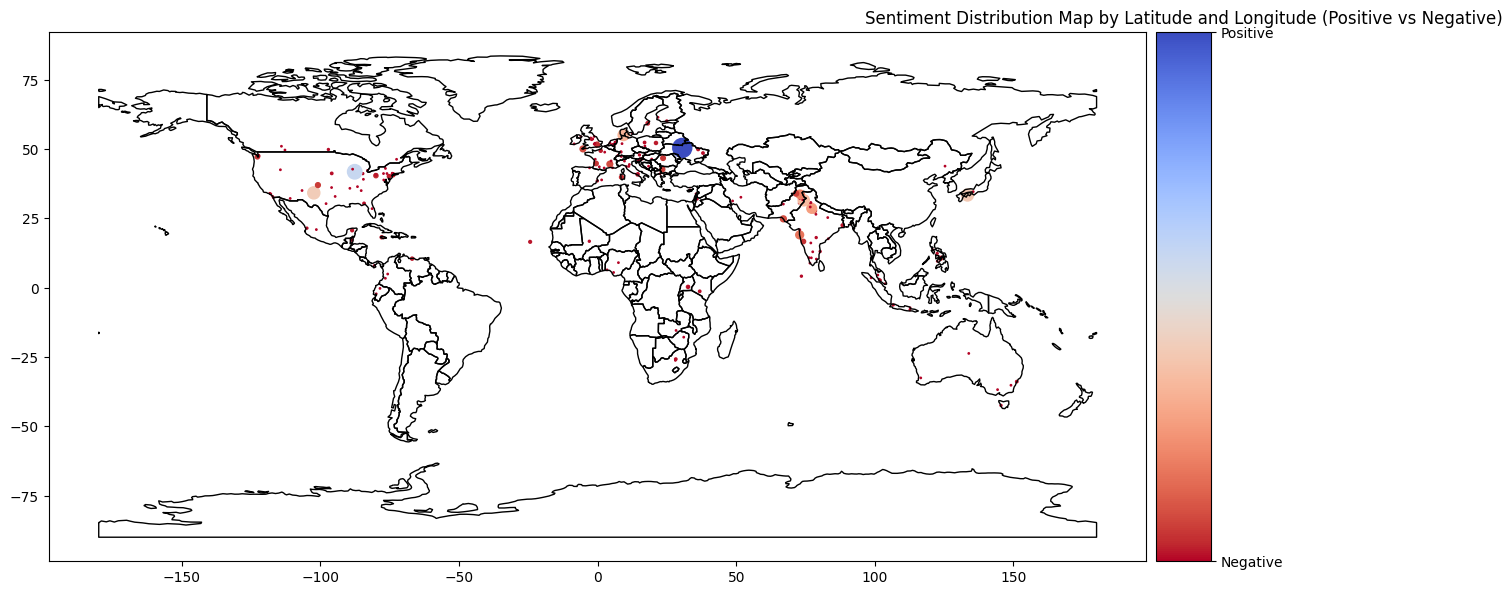

In [13]:


# Assuming your DataFrame is named 'df'
sentiment_sum = df[df['sentiment'].isin(['POSITIVE', 'NEGATIVE'])].groupby(['lat', 'lon']).size().reset_index()
sentiment_sum.columns = ['lat', 'lon', 'sentiment_sum']

# Convert latitude and longitude to Point geometry for GeoDataFrame
geometry = gpd.points_from_xy(sentiment_sum['lon'], sentiment_sum['lat'])
gdf = gpd.GeoDataFrame(sentiment_sum, geometry=geometry)

# Load the world GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the sentiment distribution on the world map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
sm.set_array(gdf['sentiment_sum'])

gdf.plot(column='sentiment_sum', cmap='coolwarm_r', markersize=gdf['sentiment_sum'], ax=ax)

# Customize the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_ticks([cbar.vmin, cbar.vmax])
cbar.set_ticklabels(['Negative', 'Positive'])

plt.title("Sentiment Distribution Map by Latitude and Longitude (Positive vs Negative)")
plt.show()
